# Demo of the NFLAM package

In the following we will demonstrate the NFLAM package. It is currently capable of doing impressive things:

In [6]:
import NFLAM

import torch
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

In [2]:
# make moon dataset

X, _ = make_moons(n_samples=2500, noise=0.1)

# make a tensor
data = torch.tensor(X, dtype=torch.float32)
data.shape

torch.Size([2500, 2])

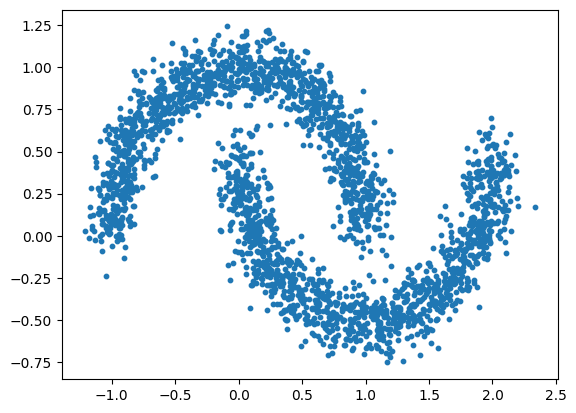

In [3]:
# visualize the dataset

plt.scatter(X[:, 0], X[:, 1], s=10)

In [4]:
LAM = NFLAM.NFLAM(data, epochs=100, k_neighbours=25)

Epoch 52 | Loss: 1.1290:  51%|█████     | 51/100 [03:16<03:08,  3.85s/it]
H:\Uni\Master\Thesis\NFLAM\NFLAM\NFLAM\NFLAM\NFLAM.py:49: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ..\torch\csrc\utils\tensor_new.cpp:277.)
  self.cov_matrices = torch.tensor(cov_matrices, dtype=torch.float32).to(self.device)


In [7]:
LAM.query(np.array([0, 2, 3]) , k_neighbours=5)

array([[   0, 1836,  681, 1890, 1735],
       [   2,  568, 2280, 2089,  603],
       [   3, 1329,  627, 1908,  370]], dtype=int64)

In [8]:
dist, path = LAM.distance(0, 3, return_path=True)
print(dist)

0.02441183986957185


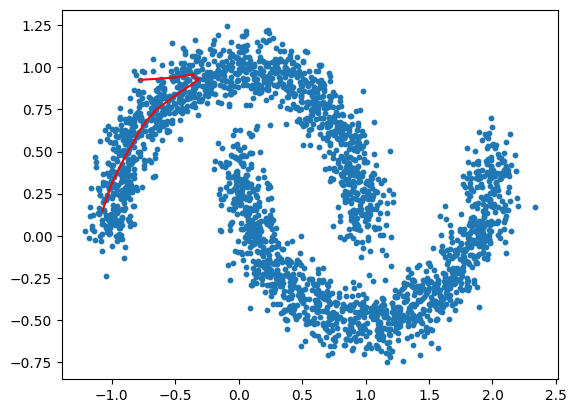

In [9]:
#plot data, and the shortest path
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.plot(X[path, 0], X[path, 1], 'r')
plt.show()

In [10]:
#check dreiecksungleichung